## Assignment GDP Analysis
<i><b> Author:</b> <u>Anish Mahapatra</u></i>
<i><b>Email-id:</b> anishmahapatra01@gmail.com </i>

##### Upgrad Module 09 - Assignment: GDP Analysis

The purpose of this the overall GDP Analysis is to help identify areas to focus on that will foster economic development for the respective states. This will be done by analyzing the GDP.

<b>GDP:</b> Monetary value of final goods and services produced by a country/state in a given period of time. It mostly consists of the following three sectors:
- Primary sector (agriculture)
- Secondary sector (industry)
- Tertiary sector (services)

In the <b>first part</b> of the analysis, the following steps will be taken care of:
- the GSDP of Indian States - both total and per capita will be analyzed
- The States will be divided into 4 cases on the basis of GSDP analysis
- Post categorizaion, analysis will be done to identify the sectors that contribute the most to GDP

In the <b>second part</b> of the analysis, we shall analyze whether GDP per capita is related to dropout rates in schools and colleges.

Let's go!

## Data Loading - Data1, GSDP, Data2

In [2]:
#Importing the required modules and packages

import matplotlib.pyplot as plt; plt.rcdefaults()
from matplotlib.ticker import StrMethodFormatter
import seaborn as sns
import pandas as pd
import numpy as np
import glob, os

pd.set_option('display.max_columns', 500)


In [3]:
# Filling in the path variable to pick up the .csv files from the 'Data Folder'
# This is just the GSDP data
path = './Data/*.csv'

# Reading all the paths to the csv files and initializing an empty list
all_files = glob.glob(path)
allFilesList = []

# For loop to ingest all csv files, transpose the data and append the same onto a master datatset

for filename in all_files:
    # Reading each file into a pandas dataframe with 'latin' encoding
    df = pd.read_csv(filename, encoding = 'latin', index_col = None, header = 0)
    
    # Transposing the data using transpose() function
    df = df.transpose()
    
    # Removing the first row that contains the headers from df
    new_header = df.iloc[0]
    df = df[1:]
    
    # Making first row as column
    df.columns = new_header
    
    # Getting the name of the state to add it as a new column in the master dataset
    df['State'] = filename.split('\\')[-1].split('.')[0]
    allFilesList.append(df)
    
# Concatenating the data into the master dataset called dfGSDP
dfStatesGDP = pd.concat(allFilesList, axis = 0, ignore_index = True)

In [4]:
# Sense check of master dataset of State's GDP
dfStatesGDP

S.No.,1,1.1,1.2,1.3,1.4,2,Total,3,4,5,Total,6,6.1,6.2,7,7.1,7.2,7.3,7.4,7.5,7.6,7.7,8,9,10,11,Total,12,13,14,15,16,17,State
0,"Agriculture, forestry and fishing",Crops,Livestock,Forestry and logging,Fishing and aquaculture,Mining and quarrying,Primary,Manufacturing,"Electricity, gas, water supply & other utility...",Construction,Secondary,"Trade, repair, hotels and restaurants",Trade & repair services,Hotels & restaurants,"Transport, storage, communication & services r...",Railways,Road transport,Water transport,Air transport,Services incidental to transport,Storage,Communication & services related to broadcasting,Financial services,"Real estate, ownership of dwelling & professio...",Public administration,Other services,Tertiary,TOTAL GSVA at basic prices,Taxes on Products,Subsidies on products,Gross State Domestic Product,Population ('00),Per Capita GSDP (Rs.),Andhra Pradesh
1,9400805,5204052,2758776,250314,1187663,1416194,10816999,5070622,1076517,3702645,9849784,2673600,2322700,350900,3251379,264279,1824800,95100,4500,501800,20700,540200,1425608,2833805,1393752,2730376,14308520,34975303,4243900,1279000,37940203,492750,76997,Andhra Pradesh
2,11186428,6123041,3358438,253029,1451920,1459027,12645455,4237657,713029,3759004,8709690,3179200,2775600,403600,3778632,303702,2200400,90400,10600,535500,16600,621430,1584297,3434098,1552379,3063920,16592526,37947671,4656500,1463800,41140371,495660,83001,Andhra Pradesh
3,12895568,7114707,3643026,280493,1857342,1419200,14314768,4242337,1014130,4065131,9321598,3784900,3290800,494100,4365811,334468,2516200,60600,5100,634700,18700,796043,1710463,3897345,1738971,3538298,19035788,42672154,5263500,1508500,46427154,498570,93121,Andhra Pradesh
4,14819416,7893514,4309078,346160,2270664,1484300,16303716,4672266,1151729,4664889,10488884,4233400,3716000,517400,5076984,424228,2816000,94200,14900,780200,18700,928756,1900863,4405409,2200897,4215389,22032942,48825542,5512100,1690800,52646842,501510,104977,Andhra Pradesh
5,17326726,8644285,5155487,340550,3186404,1633100,18959826,5078685,1251910,4986189,11316784,4577700,3964000,613700,5806226,436596,3217400,110500,25000,904200,19000,1093530,2125508,5092310,2594904,5248604,25445252,55721862,6719300,1447800,60993362,504460,120908,Andhra Pradesh
6,20386004,9717089,5979648,335487,4353780,1757565,22143569,5740816,1298947,5467732,12507496,5174600,4382200,792400,6766317,445372,3798300,123600,28000,1020800,20600,1329645,2415390,5942431,3039676,6180240,29518654,64169719,7236500,1475500,69930719,507430,137814,Andhra Pradesh
7,"Agriculture, forestry and fishing",Crops,Livestock,Forestry and logging,Fishing and aquaculture,Mining and quarrying,Primary,Manufacturing,"Electricity, gas, water supply & other utility...",Construction,Secondary,"Trade, repair, hotels and restaurants",Trade & repair services,Hotels & restaurants,"Transport, storage, communication & services r...",Railways,Road transport,Water transport,Air transport,Services incidental to transport,Storage,Communication & services related to broadcasting,Financial services,"Real estate, ownership of dwelling & professio...",Public administration,Other services,Tertiary,TOTAL GSVA at basic prices,Taxes on Products,Subsidies on products,Gross State Domestic Product,Population ('00),Per Capita GSDP (Rs.),Arunachal Pradesh
8,455505,255815,29657,165510,4523,23022,478527,12900,69131,104529,186560,59892,56921,2971,23420,30,12382,0,0,78,0,10930,20884,38261,135418,142509,420384,1085471,41341,20542,1106270,14000,79019,Arunachal Pradesh
9,545406,331962,24249,183780,5415,35024,580430,14827,78766,107821,201414,50878,47880,2998,27306,34,13618,0,0,89,0,13565,21562,41869,149466,167431,458512,1240356,43899,29591,1254664,14280,87862,Arunachal Pradesh


As the States GSDP data is required at a later point, we shall deal with the above dataset at a later point.

Let's now point our focus to load and clean th data for <b>Part I-A</b>

In [68]:
# Importing the files via loadCSV() user-defined function. The files is loaded from the "Data" folder present.
def loadCSV(csvName):
    nameOfVariable = pd.read_csv("./Data/" + csvName, encoding = 'unicode_escape')
    return nameOfVariable

# Pulling Data 1A
csvName = "Data1A/Data1-GSDPdata.csv"
dfGSDP = loadCSV(csvName)

# Pulling data required for Data 2
csvName = "Data2/Data2.csv"
data2 = loadCSV(csvName)


# Part I - GDP Analysis of the Indian States

In [69]:
# Making a temp variable for this snippet of code to analyze GSDP
df = dfGSDP
df.head()

,Items Description,Duration,Andhra Pradesh,Arunachal Pradesh,Assam,Bihar,Chhattisgarh,Goa,Gujarat,Haryana,Himachal Pradesh,Jammu & Kashmir,Jharkhand,Karnataka,Kerala,Madhya Pradesh,Maharashtra,Manipur,Meghalaya,Mizoram,Nagaland,Odisha,Punjab,Rajasthan,Sikkim,Tamil Nadu,Telangana,Tripura,Uttar Pradesh,Uttarakhand,West Bengal1,Andaman & Nicobar Islands,Chandigarh,Delhi,Puducherry,All_India GDP
0,GSDP - CURRENT PRICES (` in Crore),2011-12,379402.0,11063.0,143175.0,247144.0,158074.0,42367.0,615606.0,297539.0,72720.0,78254.0,150918.0,603778.0,364048.0,315561.0,1272967.0,12915.0,19918.0,7259.0,11839.0,227872.0,266628.0,436465.0,11165.0,751485.0,359433.0,19208.0,724049.0,115523.0,NaN,3979.0,18768.0,343767.0,16818.0,8736039.0
1,GSDP - CURRENT PRICES (` in Crore),2012-13,411404.0,12547.0,156864.0,282368.0,177511.0,38120.0,724495.0,347032.0,82820.0,87105.0,174724.0,691700.0,412313.0,380924.0,1448466.0,13748.0,21872.0,8362.0,13619.0,258275.0,297734.0,494004.0,12338.0,855481.0,401493.0,21663.0,822903.0,131835.0,NaN,4421.0,21609.0,391238.0,18875.0,9946636.0
2,GSDP - CURRENT PRICES (` in Crore),2013-14,464272.0,14602.0,177745.0,317101.0,206690.0,35921.0,807623.0,400662.0,94764.0,95893.0,188567.0,817886.0,465041.0,437737.0,1647506.0,16198.0,22938.0,10293.0,16612.0,291709.0,334714.0,549701.0,13862.0,971090.0,452186.0,25593.0,944146.0,149817.0,NaN,5159.0,24787.0,443783.0,21870.0,11236635.0
3,GSDP - CURRENT PRICES (` in Crore),2014-15,526468.0,16761.0,198098.0,373920.0,234982.0,40633.0,895027.0,437462.0,104369.0,100404.0,217107.0,921788.0,526002.0,481982.0,1792122.0,18043.0,24408.0,11559.0,18414.0,321971.0,368011.0,612194.0,15209.0,1092564.0,511178.0,29667.0,1043371.0,161985.0,NaN,5721.0,27844.0,492424.0,24089.0,12433749.0
4,GSDP - CURRENT PRICES (` in Crore),2015-16,609934.0,18784.0,224234.0,413503.0,260776.0,45002.0,994316.0,485184.0,NaN,118387.0,241955.0,1027068.0,588337.0,543975.0,NaN,NaN,26745.0,NaN,NaN,341887.0,NaN,NaN,16637.0,1212668.0,575631.0,NaN,1153795.0,184091.0,NaN,NaN,30304.0,551963.0,26533.0,13675331.0


In [70]:
df.shape

(11, 36)

In [71]:
# Having a look at the columns of the dataset
df.columns

Index(['Items  Description', 'Duration', 'Andhra Pradesh ',
       'Arunachal Pradesh', 'Assam', 'Bihar', 'Chhattisgarh', 'Goa', 'Gujarat',
       'Haryana', 'Himachal Pradesh', 'Jammu & Kashmir', 'Jharkhand',
       'Karnataka', 'Kerala', 'Madhya Pradesh', 'Maharashtra', 'Manipur',
       'Meghalaya', 'Mizoram', 'Nagaland', 'Odisha', 'Punjab', 'Rajasthan',
       'Sikkim', 'Tamil Nadu', 'Telangana', 'Tripura', 'Uttar Pradesh',
       'Uttarakhand', 'West Bengal1', 'Andaman & Nicobar Islands',
       'Chandigarh', 'Delhi', 'Puducherry', 'All_India GDP'],
      dtype='object')

In [72]:
# Making sure that the inferred data has the expected schema
df.dtypes

Items  Description            object
Duration                      object
Andhra Pradesh               float64
Arunachal Pradesh            float64
Assam                        float64
Bihar                        float64
Chhattisgarh                 float64
Goa                          float64
Gujarat                      float64
Haryana                      float64
Himachal Pradesh             float64
Jammu & Kashmir              float64
Jharkhand                    float64
Karnataka                    float64
Kerala                       float64
Madhya Pradesh               float64
Maharashtra                  float64
Manipur                      float64
Meghalaya                    float64
Mizoram                      float64
Nagaland                     float64
Odisha                       float64
Punjab                       float64
Rajasthan                    float64
Sikkim                       float64
Tamil Nadu                   float64
Telangana                    float64
T

In [73]:
# Looking at the total number of null values present in the dataset
df.isnull().sum().sum()

73

In [74]:
# Looking at NaN values at a column level to understand NaN trends
df.isnull().sum()

Items  Description            0
Duration                      0
Andhra Pradesh                0
Arunachal Pradesh             2
Assam                         2
Bihar                         2
Chhattisgarh                  0
Goa                           2
Gujarat                       2
Haryana                       0
Himachal Pradesh              4
Jammu & Kashmir               2
Jharkhand                     2
Karnataka                     2
Kerala                        2
Madhya Pradesh                0
Maharashtra                   4
Manipur                       4
Meghalaya                     0
Mizoram                       4
Nagaland                      4
Odisha                        0
Punjab                        4
Rajasthan                     4
Sikkim                        2
Tamil Nadu                    0
Telangana                     0
Tripura                       4
Uttar Pradesh                 2
Uttarakhand                   2
West Bengal1                 11
Andaman 

Here, we notice that <b>West Bengal</b> has not been up to the mark in providing the government with GDP data, with <b>all</b> of the values in the column missing, we shall not proceed to remove the columns that houses West bengal

In [75]:
# Dropping West Bengal from the dataframe and performing a quick sense check of the data
df = df.drop('West Bengal1' , axis='columns')
df.shape

(11, 35)

The datset now has 11 rows and 35 columns

In [76]:
# Code to understand the pattern of missing values row-wise
df.isnull().sum(axis=1)

0      0
1      0
2      0
3      0
4      9
5     22
6      0
7      0
8      0
9      9
10    22
dtype: int64

We notice that the data for 2016-17, whose absolute value (in crores) and growth % - (rows 6 and 11 respctively) have over 61% of missing value as data may not have been collected accurately as the report was being made. So, we shall be removing the rows for the purposes of data cleaning. 

Further, we also notice that the data for the time-period for of 2015-16 has 9 missing values, we have decided to keep the rows for analytical purposes.

In [77]:
# Code to keep rows where at least 50% of the data is present
df = df.dropna(thresh=18)
df.isnull().sum(axis=1)

0    0
1    0
2    0
3    0
4    9
6    0
7    0
8    0
9    9
dtype: int64

In [78]:
# Post cleaning and handling NA values, we now proceed to display the data 
# Perform a sense check and re-assess the level of the data
df.head()

,Items Description,Duration,Andhra Pradesh,Arunachal Pradesh,Assam,Bihar,Chhattisgarh,Goa,Gujarat,Haryana,Himachal Pradesh,Jammu & Kashmir,Jharkhand,Karnataka,Kerala,Madhya Pradesh,Maharashtra,Manipur,Meghalaya,Mizoram,Nagaland,Odisha,Punjab,Rajasthan,Sikkim,Tamil Nadu,Telangana,Tripura,Uttar Pradesh,Uttarakhand,Andaman & Nicobar Islands,Chandigarh,Delhi,Puducherry,All_India GDP
0,GSDP - CURRENT PRICES (` in Crore),2011-12,379402.0,11063.0,143175.0,247144.0,158074.0,42367.0,615606.0,297539.0,72720.0,78254.0,150918.0,603778.0,364048.0,315561.0,1272967.0,12915.0,19918.0,7259.0,11839.0,227872.0,266628.0,436465.0,11165.0,751485.0,359433.0,19208.0,724049.0,115523.0,3979.0,18768.0,343767.0,16818.0,8736039.0
1,GSDP - CURRENT PRICES (` in Crore),2012-13,411404.0,12547.0,156864.0,282368.0,177511.0,38120.0,724495.0,347032.0,82820.0,87105.0,174724.0,691700.0,412313.0,380924.0,1448466.0,13748.0,21872.0,8362.0,13619.0,258275.0,297734.0,494004.0,12338.0,855481.0,401493.0,21663.0,822903.0,131835.0,4421.0,21609.0,391238.0,18875.0,9946636.0
2,GSDP - CURRENT PRICES (` in Crore),2013-14,464272.0,14602.0,177745.0,317101.0,206690.0,35921.0,807623.0,400662.0,94764.0,95893.0,188567.0,817886.0,465041.0,437737.0,1647506.0,16198.0,22938.0,10293.0,16612.0,291709.0,334714.0,549701.0,13862.0,971090.0,452186.0,25593.0,944146.0,149817.0,5159.0,24787.0,443783.0,21870.0,11236635.0
3,GSDP - CURRENT PRICES (` in Crore),2014-15,526468.0,16761.0,198098.0,373920.0,234982.0,40633.0,895027.0,437462.0,104369.0,100404.0,217107.0,921788.0,526002.0,481982.0,1792122.0,18043.0,24408.0,11559.0,18414.0,321971.0,368011.0,612194.0,15209.0,1092564.0,511178.0,29667.0,1043371.0,161985.0,5721.0,27844.0,492424.0,24089.0,12433749.0
4,GSDP - CURRENT PRICES (` in Crore),2015-16,609934.0,18784.0,224234.0,413503.0,260776.0,45002.0,994316.0,485184.0,NaN,118387.0,241955.0,1027068.0,588337.0,543975.0,NaN,NaN,26745.0,NaN,NaN,341887.0,NaN,NaN,16637.0,1212668.0,575631.0,NaN,1153795.0,184091.0,NaN,30304.0,551963.0,26533.0,13675331.0


Here, we notice that the first 5 and last 4 rows have the same name, so the level of the data is at a 

"Items Description"-"Duration" level". We shall use the 'Duation' column as the unique identifier.

In [79]:
# Renaming the columns to make the naming nomenclature more intuitive
df.rename(columns={'Items  Description':'GDPType_Duration', 'All_India GDP':'All_India_GDP'}, inplace=True)

On observing the dataframe at hand, we realize that the scale of the dataframe across rows is not the same across rows. 
We have two sets in the rows
1. GSDP Current Prices
2. % Growth over previous year

We shall be slicing the data to get 2 subsets of dfCurrentPrices that consists of the GSDP CURRENT PRICES (In Crores) and dfPercentageGrowth that gives us the % growth over previous year.

In [80]:
# Slicing the data to get the Current Price and % Growth as separate dataframes to carry out analysis
dfCurrentPrices = df.iloc[0:5,:]
dfPercentageGrowth = df.iloc[5:10,:]

In [81]:
# Reindexing the data
dfCurrentPrices.reset_index(inplace = True, drop = True)
dfPercentageGrowth.reset_index(inplace = True, drop = True)

In [82]:
# Sense check of data
dfCurrentPrices

,GDPType_Duration,Duration,Andhra Pradesh,Arunachal Pradesh,Assam,Bihar,Chhattisgarh,Goa,Gujarat,Haryana,Himachal Pradesh,Jammu & Kashmir,Jharkhand,Karnataka,Kerala,Madhya Pradesh,Maharashtra,Manipur,Meghalaya,Mizoram,Nagaland,Odisha,Punjab,Rajasthan,Sikkim,Tamil Nadu,Telangana,Tripura,Uttar Pradesh,Uttarakhand,Andaman & Nicobar Islands,Chandigarh,Delhi,Puducherry,All_India_GDP
0,GSDP - CURRENT PRICES (` in Crore),2011-12,379402.0,11063.0,143175.0,247144.0,158074.0,42367.0,615606.0,297539.0,72720.0,78254.0,150918.0,603778.0,364048.0,315561.0,1272967.0,12915.0,19918.0,7259.0,11839.0,227872.0,266628.0,436465.0,11165.0,751485.0,359433.0,19208.0,724049.0,115523.0,3979.0,18768.0,343767.0,16818.0,8736039.0
1,GSDP - CURRENT PRICES (` in Crore),2012-13,411404.0,12547.0,156864.0,282368.0,177511.0,38120.0,724495.0,347032.0,82820.0,87105.0,174724.0,691700.0,412313.0,380924.0,1448466.0,13748.0,21872.0,8362.0,13619.0,258275.0,297734.0,494004.0,12338.0,855481.0,401493.0,21663.0,822903.0,131835.0,4421.0,21609.0,391238.0,18875.0,9946636.0
2,GSDP - CURRENT PRICES (` in Crore),2013-14,464272.0,14602.0,177745.0,317101.0,206690.0,35921.0,807623.0,400662.0,94764.0,95893.0,188567.0,817886.0,465041.0,437737.0,1647506.0,16198.0,22938.0,10293.0,16612.0,291709.0,334714.0,549701.0,13862.0,971090.0,452186.0,25593.0,944146.0,149817.0,5159.0,24787.0,443783.0,21870.0,11236635.0
3,GSDP - CURRENT PRICES (` in Crore),2014-15,526468.0,16761.0,198098.0,373920.0,234982.0,40633.0,895027.0,437462.0,104369.0,100404.0,217107.0,921788.0,526002.0,481982.0,1792122.0,18043.0,24408.0,11559.0,18414.0,321971.0,368011.0,612194.0,15209.0,1092564.0,511178.0,29667.0,1043371.0,161985.0,5721.0,27844.0,492424.0,24089.0,12433749.0
4,GSDP - CURRENT PRICES (` in Crore),2015-16,609934.0,18784.0,224234.0,413503.0,260776.0,45002.0,994316.0,485184.0,NaN,118387.0,241955.0,1027068.0,588337.0,543975.0,NaN,NaN,26745.0,NaN,NaN,341887.0,NaN,NaN,16637.0,1212668.0,575631.0,NaN,1153795.0,184091.0,NaN,30304.0,551963.0,26533.0,13675331.0


In [83]:
# Sense check of data
dfPercentageGrowth

,GDPType_Duration,Duration,Andhra Pradesh,Arunachal Pradesh,Assam,Bihar,Chhattisgarh,Goa,Gujarat,Haryana,Himachal Pradesh,Jammu & Kashmir,Jharkhand,Karnataka,Kerala,Madhya Pradesh,Maharashtra,Manipur,Meghalaya,Mizoram,Nagaland,Odisha,Punjab,Rajasthan,Sikkim,Tamil Nadu,Telangana,Tripura,Uttar Pradesh,Uttarakhand,Andaman & Nicobar Islands,Chandigarh,Delhi,Puducherry,All_India_GDP
0,(% Growth over previous year),2012-13,8.43,13.41,9.56,14.25,12.30,-10.02,17.69,16.63,13.89,11.31,15.77,14.56,13.26,20.71,13.79,6.45,9.81,15.2,15.03,13.34,11.67,13.18,10.51,13.84,11.70,12.78,13.65,14.12,11.13,15.14,13.81,12.23,13.86
1,(% Growth over previous year),2013-14,12.85,16.38,13.31,12.30,16.44,-5.77,11.47,15.45,14.42,10.09,7.92,18.24,12.79,14.91,13.74,17.83,4.87,23.1,21.98,12.95,12.42,11.27,12.35,13.51,12.63,18.14,14.73,13.64,16.68,14.71,13.43,15.87,12.97
2,(% Growth over previous year),2014-15,13.40,14.79,11.45,17.92,13.69,13.12,10.82,9.18,10.14,4.70,15.14,12.70,13.11,10.11,8.78,11.39,6.41,12.3,10.85,10.37,9.95,11.37,9.72,12.51,13.05,15.92,10.51,8.12,10.89,12.33,10.96,10.14,10.65
3,(% Growth over previous year),2015-16,15.85,12.07,13.19,10.59,10.98,10.75,11.09,10.91,NaN,17.91,11.44,11.42,11.85,12.86,NaN,NaN,9.58,NaN,NaN,6.19,NaN,NaN,9.39,10.99,12.61,NaN,10.58,13.65,NaN,8.84,12.09,10.15,9.99


The All India GDP heavily skews the data and makes graphs difficult to look at! So, we shall perform analysis on the <b>All India GDP</b> separately and plot grahs for the same separately and then proceed to do analysis on the rest of the columns.


### Part I: GDP Analysis of the State
<i> Note: </i>Plots made should preferably be in ascending/ descending order for easy interpretation

The steps for the analysis of Part 1-A will include the below steps (in no particular order):
- Loading the csvs from a set folder that consists of all the necessary data
- Performing sense checks on data to ensure that there are no corrupt files
- Analysis of missing values
- Treatment of missing values
- Graph (in ascending/ descending order) showing "% Growth over previous year" for <b>All States</b> using line graphs. Use best fit line to represent growth for each state
- Similar graph representing the growth of the nation as well

### All India GDP

In [84]:
# Subsetting all India GDP Prices in the variable dfCurrentPricesAllIndiaGDP
dfCurrentPricesAllIndiaGDP = dfCurrentPrices.iloc[:,[1,-1]]
dfCurrentPricesAllIndiaGDP

,Duration,All_India_GDP
0,2011-12,8736039.0
1,2012-13,9946636.0
2,2013-14,11236635.0
3,2014-15,12433749.0
4,2015-16,13675331.0


#### GSDP - Current Prices (All India GDP)

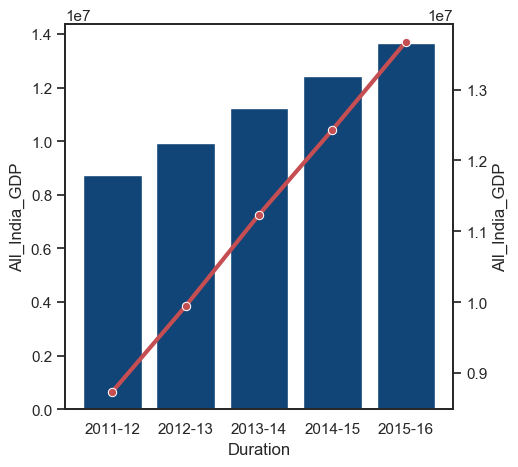

In [85]:
# Sorting and resetting the index to ensure that the plots displayed are in order
dfCurrentPricesAllIndiaGDP = dfCurrentPricesAllIndiaGDP.sort_values(['All_India_GDP']).reset_index(inplace = True, drop = True)

# Assigning All India GDP values to the variable 'y' and (GDP Type and Duration) to variable 'x'
x = dfCurrentPrices.Duration
y = dfCurrentPrices.All_India_GDP

# Plotting both bar plot and best fit line in the same plot
sns.set(style="white", rc={"lines.linewidth": 3})

fig, ax1 = plt.subplots(figsize=(5,5))
ax2 = ax1.twinx()
sns.barplot(x, y, color='#004488', ax=ax1)
sns.lineplot(x, y, color='r', marker="o", ax=ax2)
plt.show()
sns.set()

#### GSDP - % Growth (All India GDP)

In [86]:
# Subsetting all India % Growth in the variable dfPercentageGrowthAllIndiaGDP
dfPercentageGrowthAllIndiaGDP = dfPercentageGrowth.iloc[:, [1,-1]]
dfPercentageGrowthAllIndiaGDP

dfPercentageGrowthAllIndiaGDP.rename(columns={'All_India_GDP':'All_India_GDP_Percentage_Growth'}, inplace=True)


E:\Miniconda\envs\ipykernel\lib\site-packages\pandas\core\frame.py:3781: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataFrame, self).rename(**kwargs)


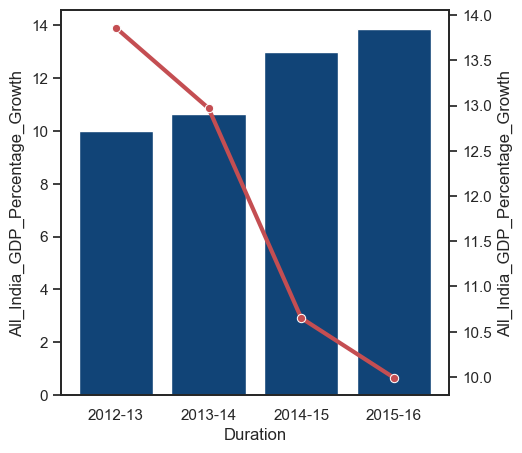

In [88]:
# Sorting the GDP % Growth values to ensure optimal graphs for All India GDP
dfPercentageGrowthAllIndiaGDP = dfPercentageGrowthAllIndiaGDP.sort_values(['All_India_GDP_Percentage_Growth']).reset_index(drop = True)

# Assigning All India GDP values to the variable 'y' and (GDP Type and Duration) to variable 'x'
x = dfPercentageGrowthAllIndiaGDP.Duration
y = dfPercentageGrowthAllIndiaGDP.All_India_GDP_Percentage_Growth

# Plotting both bar plot and best fit line in the same plot
sns.set(style="white", rc={"lines.linewidth": 3})

fig, ax1 = plt.subplots(figsize=(5,5))
ax2 = ax1.twinx()

# Bar plot
sns.barplot(x, y, color='#004488', ax=ax1)

#Line Plot 
sns.lineplot(x, y, color='r', marker="o", ax=ax2)
plt.show()
sns.set()

In [89]:
# Sense check of sliced % growth data
dfPercentageGrowth

,GDPType_Duration,Duration,Andhra Pradesh,Arunachal Pradesh,Assam,Bihar,Chhattisgarh,Goa,Gujarat,Haryana,Himachal Pradesh,Jammu & Kashmir,Jharkhand,Karnataka,Kerala,Madhya Pradesh,Maharashtra,Manipur,Meghalaya,Mizoram,Nagaland,Odisha,Punjab,Rajasthan,Sikkim,Tamil Nadu,Telangana,Tripura,Uttar Pradesh,Uttarakhand,Andaman & Nicobar Islands,Chandigarh,Delhi,Puducherry,All_India_GDP
0,(% Growth over previous year),2012-13,8.43,13.41,9.56,14.25,12.30,-10.02,17.69,16.63,13.89,11.31,15.77,14.56,13.26,20.71,13.79,6.45,9.81,15.2,15.03,13.34,11.67,13.18,10.51,13.84,11.70,12.78,13.65,14.12,11.13,15.14,13.81,12.23,13.86
1,(% Growth over previous year),2013-14,12.85,16.38,13.31,12.30,16.44,-5.77,11.47,15.45,14.42,10.09,7.92,18.24,12.79,14.91,13.74,17.83,4.87,23.1,21.98,12.95,12.42,11.27,12.35,13.51,12.63,18.14,14.73,13.64,16.68,14.71,13.43,15.87,12.97
2,(% Growth over previous year),2014-15,13.40,14.79,11.45,17.92,13.69,13.12,10.82,9.18,10.14,4.70,15.14,12.70,13.11,10.11,8.78,11.39,6.41,12.3,10.85,10.37,9.95,11.37,9.72,12.51,13.05,15.92,10.51,8.12,10.89,12.33,10.96,10.14,10.65
3,(% Growth over previous year),2015-16,15.85,12.07,13.19,10.59,10.98,10.75,11.09,10.91,NaN,17.91,11.44,11.42,11.85,12.86,NaN,NaN,9.58,NaN,NaN,6.19,NaN,NaN,9.39,10.99,12.61,NaN,10.58,13.65,NaN,8.84,12.09,10.15,9.99


In [90]:
# Removing All_India_GDP from the dfCurrentProcess dataset to focus on the States
dfCurrentPrices = dfCurrentPrices.iloc[0:5, 1:34]
dfPercentageGrowth = dfPercentageGrowth.iloc[0:4, 1:34]

For the purposes of plotting, it is always preferred that one uses data in <b>tall-format</b>, rather than wide. So, we shall be transposing the sliced datasets of Current Prices and % growth.

In [91]:
# Transposing the dfCurrentPrices dataset 
tdfCurrentPrices = dfCurrentPrices.transpose()

# When transposing, the first column of the inital dataframe becomes the first row of the transposed dataframe
# Code to move the first rows of dataframe as column headers and drop first row
tdfCurrentPrices.columns = tdfCurrentPrices.iloc[0]
tdfCurrentPrices = tdfCurrentPrices.drop(tdfCurrentPrices.index[0])

# Typecasting the data from string (object) to type int
tdfCurrentPrices = tdfCurrentPrices.astype(str).astype(float)
tdfCurrentPrices['Average_Growth_Current_Price'] = tdfCurrentPrices.mean(axis = 1)

# Making the index a new column and re-indexing th pandas dataframe
tdfCurrentPrices['States'] = tdfCurrentPrices.index
tdfCurrentPrices.reset_index(inplace = True, drop = True)

# Printing the dataset for sense check
tdfCurrentPrices.head()

Duration,2011-12,2012-13,2013-14,2014-15,2015-16,Average_Growth_Current_Price,States
0,379402.0,411404.0,464272.0,526468.0,609934.0,478296.0,Andhra Pradesh
1,11063.0,12547.0,14602.0,16761.0,18784.0,14751.4,Arunachal Pradesh
2,143175.0,156864.0,177745.0,198098.0,224234.0,180023.2,Assam
3,247144.0,282368.0,317101.0,373920.0,413503.0,326807.2,Bihar
4,158074.0,177511.0,206690.0,234982.0,260776.0,207606.6,Chhattisgarh


#### State-wise absolute Current Prices (GDP Analysis)

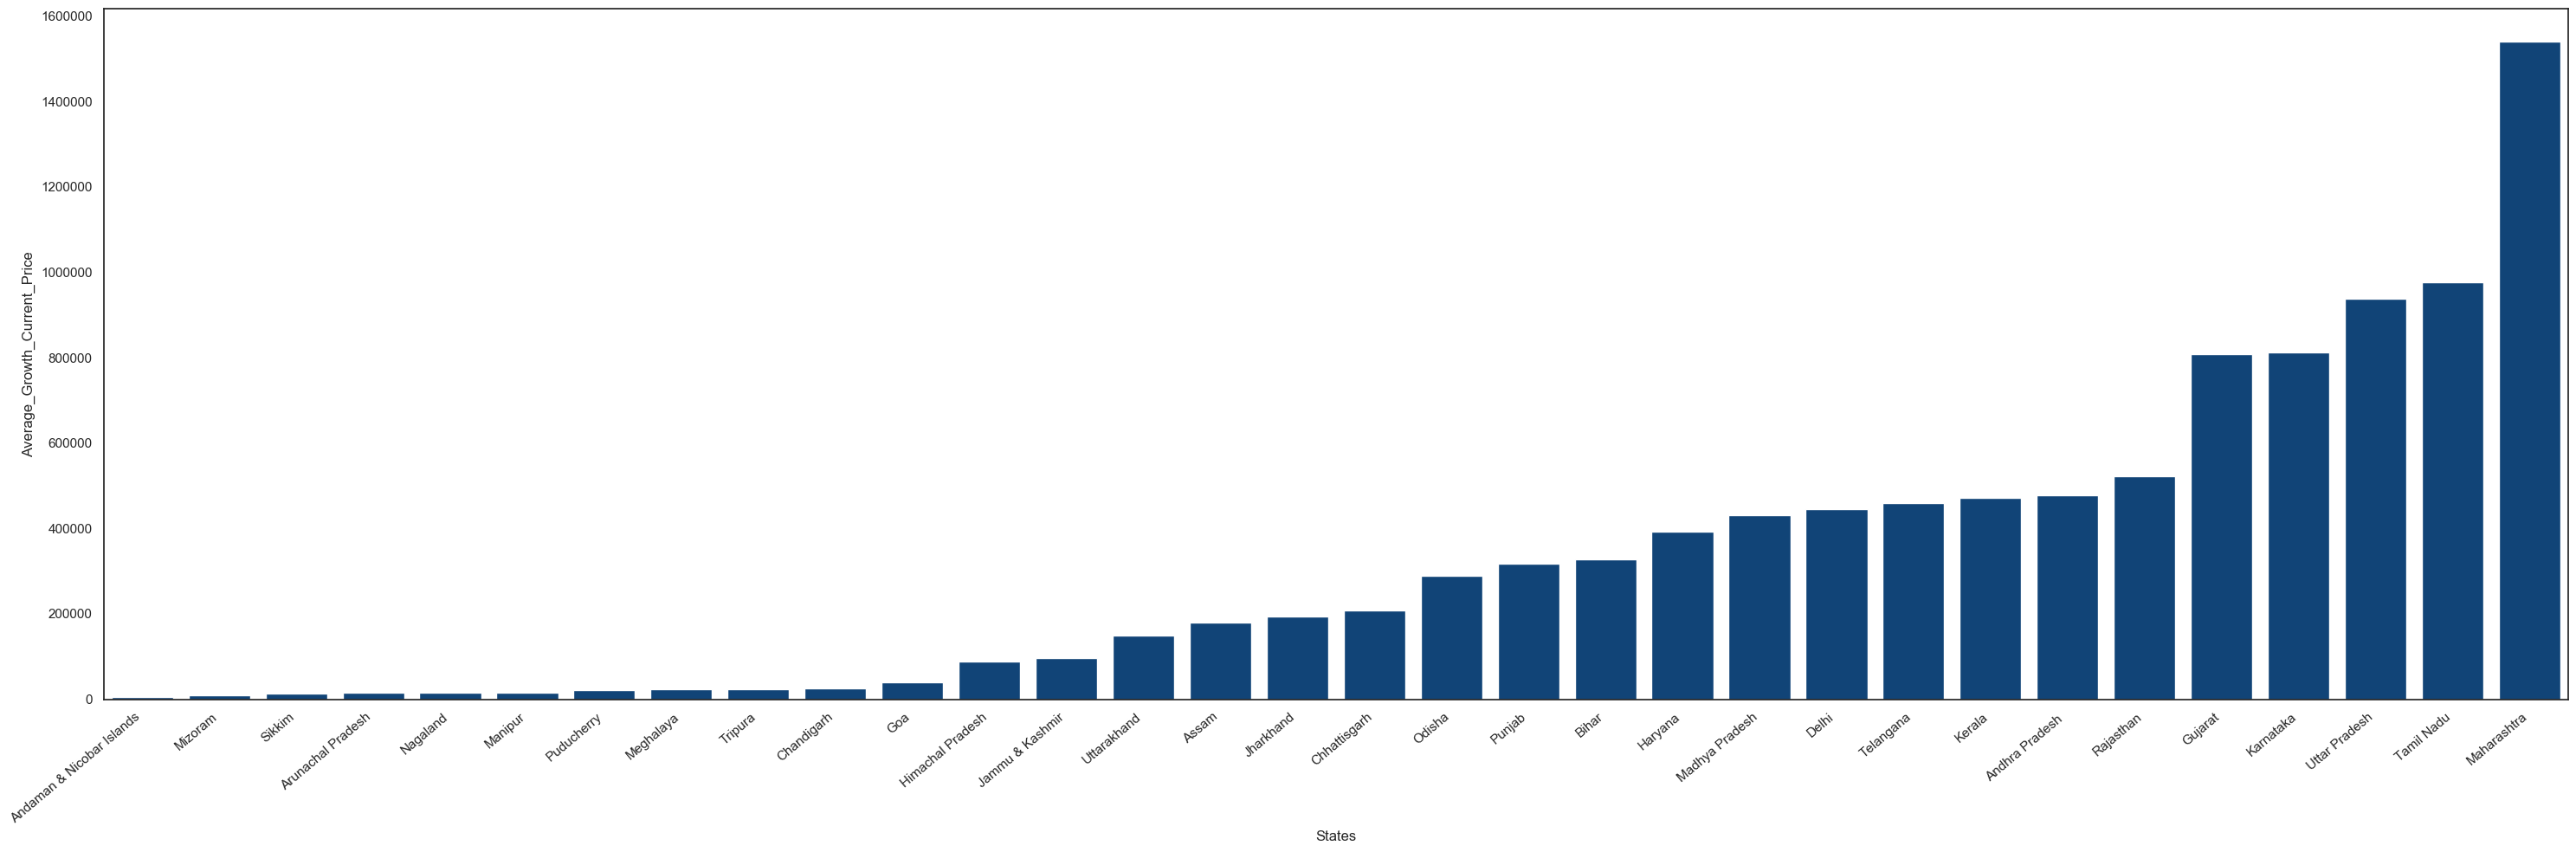

In [92]:
# Sorting absolute Current Prices values
tdfCurrentPrices = tdfCurrentPrices.sort_values(['Average_Growth_Current_Price']).reset_index(drop = True)

# Specifying the values of x-axis and y-axis
x = tdfCurrentPrices.States
y = tdfCurrentPrices.Average_Growth_Current_Price
sns.set(style="white")

# Deciding the size of the graph to be plotted 
fig, ax = plt.subplots(figsize=(30,10))

# Plotting a bar plot
ax1 = sns.barplot(x, y, color='#004488')

# Rotating the State names by 45 degrees
ax1.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()

# Displaying the plot along with the state names
plt.show()
sns.set()

In [93]:
# Transposing the dataset 
tdfPercentageGrowth = dfPercentageGrowth.transpose()

# When transposing, the first column of the inital dataframe becomes the first row of the transposed dataframe
# Code to move the first rows of dataframe as column headers and drop first row
tdfPercentageGrowth.columns = tdfPercentageGrowth.iloc[0]
tdfPercentageGrowth = tdfPercentageGrowth.drop(tdfPercentageGrowth.index[0])

# Typecasting the data from string (object) to type int
tdfPercentageGrowth = tdfPercentageGrowth.astype(str).astype(float)
tdfPercentageGrowth['Average_Percentage_Growth'] = tdfPercentageGrowth.mean(axis = 1)

# Making the index a new column and re-indexing the pandas dataframe
tdfPercentageGrowth['States'] = tdfPercentageGrowth.index
tdfPercentageGrowth.reset_index(inplace = True, drop = True)

# Printing the dataset for sense check
tdfPercentageGrowth.head()

Duration,2012-13,2013-14,2014-15,2015-16,Average_Percentage_Growth,States
0,8.43,12.85,13.40,15.85,12.6325,Andhra Pradesh
1,13.41,16.38,14.79,12.07,14.1625,Arunachal Pradesh
2,9.56,13.31,11.45,13.19,11.8775,Assam
3,14.25,12.30,17.92,10.59,13.7650,Bihar
4,12.30,16.44,13.69,10.98,13.3525,Chhattisgarh


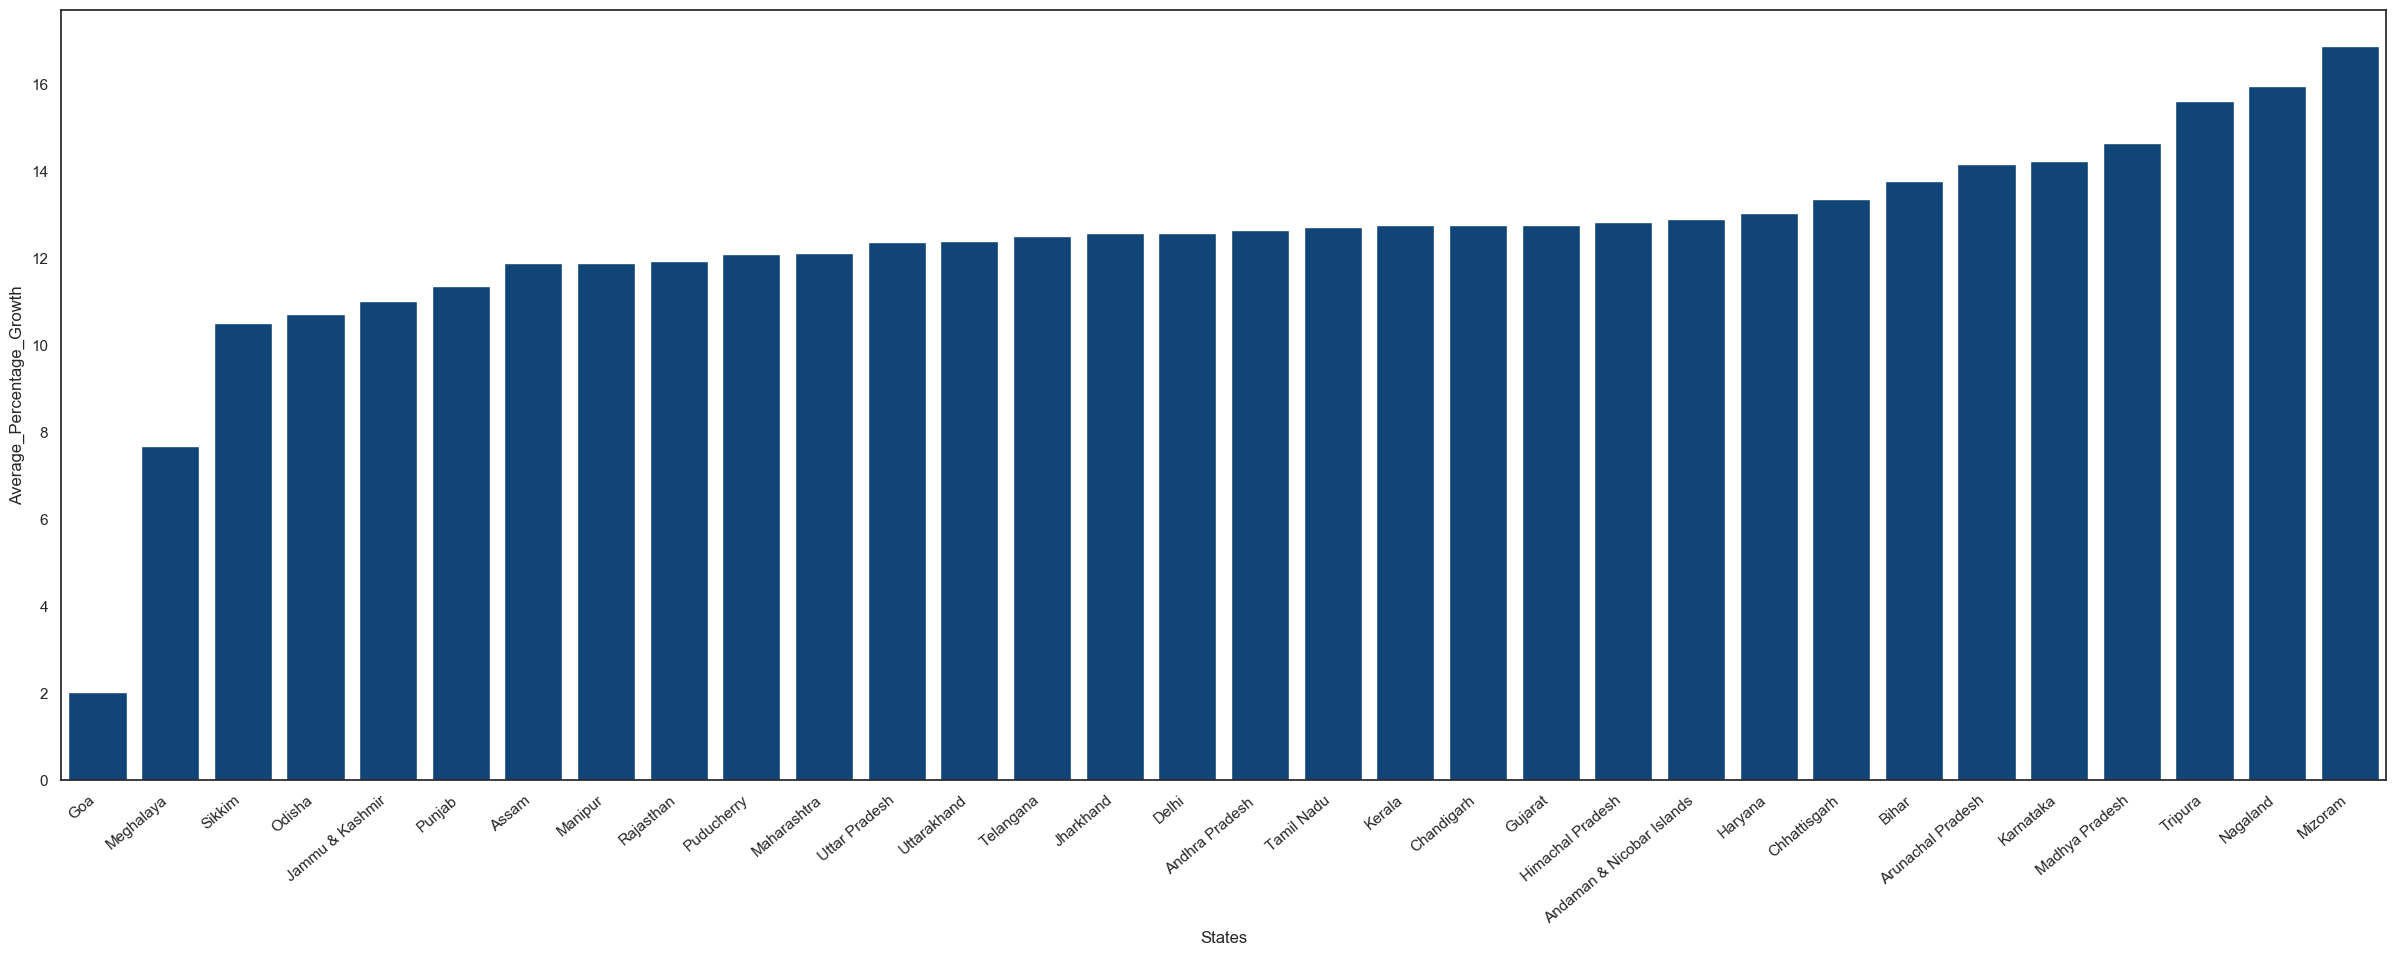

In [94]:
# Sorting absolute Current Prices values
tdfPercentageGrowth = tdfPercentageGrowth.sort_values(['Average_Percentage_Growth']).reset_index(drop = True)

# Specifying the values of x-axis and y-axis
x = tdfPercentageGrowth.States
y = tdfPercentageGrowth.Average_Percentage_Growth
sns.set(style="white")

# Deciding the size of the graph to be plotted 
fig, ax = plt.subplots(figsize=(30,10))

# Rotating the State names by 45 degrees to make it easier to view
ax1 = sns.barplot(x, y, color='#004488')
ax1.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")

# Displaying the plot along with the state names
plt.show()
sns.set()


### Best fit line for % growth of States

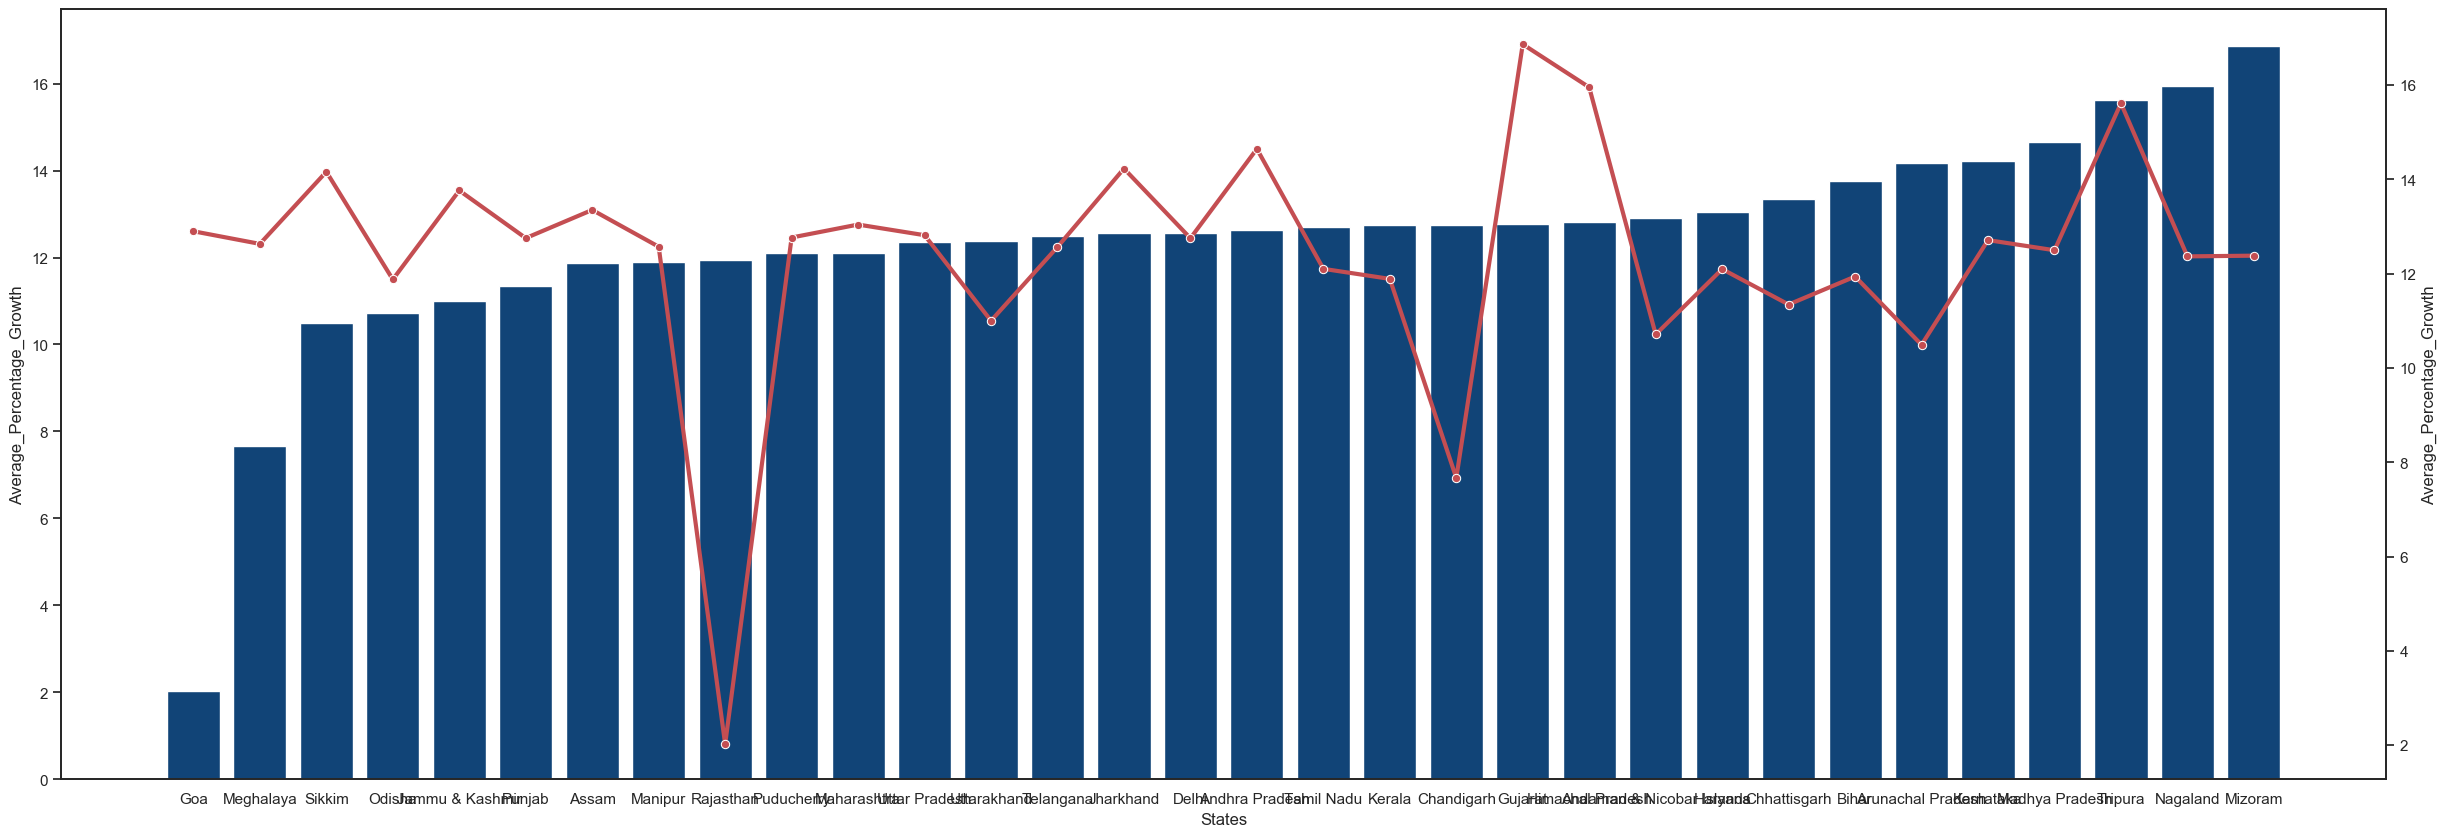

In [95]:
# Sorting absolute Current Prices values
tdfPercentageGrowth = tdfPercentageGrowth.sort_values(['Average_Percentage_Growth']).reset_index(drop = True)

x = tdfPercentageGrowth.States
y = tdfPercentageGrowth.Average_Percentage_Growth
sns.set(style="white", rc={"lines.linewidth": 3})

fig, ax1 = plt.subplots(figsize=(30,10))
ax2 = ax1.twinx()

# Bar plot
sns.barplot(x, y, color='#004488', ax=ax1)
ax1 = sns.lineplot(x, y, color='r', marker="o")
ax1.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
# plt.tight_layout()

plt.show()
sns.set()

Post the cleaning of data and analysis of the same, we shall now proceed to answer the following questions:

1. How will you compare the growth rates of any two states?
     - We can compare the growth rate of any 2 states by looking at the plots of the % growth over the years. An accurate representation of the same can be found using the % Growth average, state-wise.
     

2. Which states have been growing consistently fast, and which ones have been struggling? Rank top 3 fastest and 3 slowest-growing states.
    - We shall use the bar plots for this analysis.
    The top 3 states in terms of growth have been: 
    1. Mizoram
    2. Nagaland
    3. Tripura
    
    and, the bottom 3 states that have been struggling:
    1. Goa
    2. Meghalaya
    3. Sikkim
    

3. What is the Nation's Growth Rate?
    - 

4. What has been the average growth rate of your home state, and how does it compare to the national average?
    - 
    

Now that we have answered the above questions, we shall now proceed to perform the following analysis:
#### Plot the total GDP of the states for the year 2015-16:
1. Which Plot will you use for this? Why? (Remeber to plot the graph in a way such as it is easier to read and compare)

2. Identify the top 5 and the bottom 5 states based on total GDP.

3. What insights can you draw from this graph? What states are performing poorly? (Remember: this will not be solely based on total GDP)

### Part I-B

<i>Note: The analysis is to be done for the years of 2014-15</i>

The analysis is to be formed for Indian States (exclusing union territories)

Following are the steps to be followed:
- Plot the GDP per capita for all the states.
     - Identify the top 5 and the bottom 5 states based on the GDP per capita.
     - Find the ratio of the highest per capita GDP to the lowest per capita GDP.
     

- Plot the percentage contribution of the primary, secondary and tertiary sectors as a percentage of the total GDP for all the states.
    - Which plot will you use here? Why?
    - Why is (Primary + Secondary + Tertiary) not equal to total GDP?
    - Can you draw any insight from this? Find correlation of percentile of the state (% of states with lower GDP) and %contribution of Primary sector to total GDP.


- Categorise the states into four groups based on the GDP per capita (C1, C2, C3, C4, where C1 would have the highest per capita GDP and C4, the lowest). The quantile values are (0.20,0.5, 0.85, 1), i.e., the states lying between the 85th and the 100th percentile are in C1; those between the 50th and the 85th percentiles are in C2, and so on.

For each category (C1, C2, C3, C4):
Find the top 3/4/5 sub-sectors (such as agriculture, forestry and fishing, crops, manufacturing etc., not primary, secondary and tertiary) that contribute to approximately 80% of the GSDP of each category.

    - Note-I: The nomenclature for this project is as follows: primary, secondary and tertiary are named 'sectors', while agriculture, manufacturing etc. are named 'sub-sectors'.

    - Note-II: If the top 3 sub-sectors contribute to, say, 79% of the GDP of some category, you can report "These top 3 sub-sectors contribute to approximately 80% of the GDP". This is to simplify the analysis and make the results consumable. (Remember, the CEO has to present the report to the CMs, and CMs have limited time; so, the analysis needs to be sharp and concise.)

Plot the contribution of the sub-sectors as a percentage of the GSDP of each category.  

Now that you have summarised the data in the form of plots, tables, etc., try to draw non-obvious insights from it. Think about questions such as:

- How does the GDP distribution of the top states (C1) differ from the others?
- Which sub-sectors seem to be correlated with high GDP?
- Which sub-sectors do the various categories need to focus on? 

Ask other such relevant questions, which you think are important, and note your insights for category separately. More insights are welcome and will be awarded accordingly.

Finally, provide at least two recommendations for each category to improve the per capita GDP.

### Part-II: GDP and Education Dropout Rates

In Part-I, you would have noticed that (one) way to increase per capita GDP is by shifting the distribution of GDP towards the secondary and tertiary sectors, i.e., the manufacturing and services industries. But these industries can thrive only when there is an availability of educated and skilled labour.

In this part of the analysis, you will investigate whether there is any relationship between per capita GDP with dropout rates in education.

- Analyse if there is any correlation of GDP per capita with dropout rates in education (primary, upper primary and secondary) for the year 2014-2015 for each state. Choose an appropriate plot to conduct this analysis.
    - Is there any correlation between dropout rate and %contribution of each sector (Primary, Secondary and Tertiary) to the total GDP?


- You have the total population of each state from the data in part I. Is there any correlation between dropout rates and population? What is the expected trend and what is the observation?


- Write down the key insights you draw from this data:
    - Form at least one reasonable hypothesis for the observations from the data

 